In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from CASutils import averaging_utils as avg
from CASutils import linfit_utils as linfit
from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars

import warnings
warnings.filterwarnings('ignore')

import importlib
importlib.reload(linfit)

<module 'CASutils.linfit_utils' from '/home/islas/python/CASanalysis/CASutils/linfit_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/"

### AOD for AAER1 and AAER2

In [3]:
aod1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_AODVIS_am.nc")
aod1 = aod1.mean('M')
aod2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_AODVIS_am.nc")
aod2 = aod2.mean('M')

In [4]:
aod1period = aod1.sel(year=slice(2000,2050))
aod2period = aod2.sel(year=slice(2000,2050))

aod1trend = xr.apply_ufunc(linfit.compute_slope, aod1period, vectorize=True,
                           input_core_dims=[['year']])*aod1period.year.size
aod2trend = xr.apply_ufunc(linfit.compute_slope, aod2period, vectorize=True,
                           input_core_dims=[['year']])*aod2period.year.size

aod1trend = aod1trend.load()
aod2trend = aod2trend.load()

### Forcings for AAER1 and AAER2

In [5]:
aer1_forcings = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/FORCINGS/AAER_LENS1.nc")
aer1_forcings = aer1_forcings.sel(year=slice(1850,2050))
aer2_forcings = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/FORCINGS/AAER.nc")
aer2_forcings = aer2_forcings.sel(year=slice(1850,2050))

years = np.arange(1850,2051,1)
aer1_forcings_interp = aer1_forcings.interp(year=years).load()
aer2_forcings_interp = aer2_forcings.interp(year=years).load()

In [6]:
aer1_bc = aer1_forcings_interp.anthro_bc
aer2_bc = aer2_forcings_interp.anthro_bc

aer1_so4 = aer1_forcings.anthro_so4
aer2_so4 = aer2_forcings.ene_ind_so4 + aer2_forcings.ag_so4 + aer2_forcings.restran_so4 + aer2_forcings.ship_so4

### Burden's

In [7]:
aer1_bc_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENBC_am.nc")
aer1_so4_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_BURDENSO4_am.nc")

aer2_bc_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENBCdn_am.nc")
aer2_so4_burden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_BURDENSO4dn_am.nc")

In [8]:
aer1_bc_burden = aer1_bc_burden.mean('M') ; aer1_so4_burden = aer1_so4_burden.mean('M')
aer2_bc_burden = aer2_bc_burden.mean('M') ; aer2_so4_burden = aer2_so4_burden.mean('M')

In [9]:
aer1_bc_burden_gm = avg.cosweightlonlat(aer1_bc_burden,0,360,-90,90).load()
aer1_so4_burden_gm = avg.cosweightlonlat(aer1_so4_burden,0,360,-90,90).load()
aer2_bc_burden_gm = avg.cosweightlonlat(aer2_bc_burden,0,360,-90,90).load()
aer2_so4_burden_gm = avg.cosweightlonlat(aer2_so4_burden,0,360,-90,90).load()

In [10]:
#bootburden = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig2/CESM2_bootstrap.nc")

### Deposition and burdens for a single member of the all forcing run

In [11]:
### CESM1 data
var=['bc_a1DDF','bc_c1DDF','bc_a1SFWET','bc_c1SFWET','BURDENBC',
    'so4_a1DDF','so4_a2DDF','so4_a3DDF','so4_a1SFWET','so4_a2SFWET','so4_a3SFWET',
     'so4_c1DDF','so4_c2DDF','so4_c3DDF','so4_c1SFWET','so4_c2SFWET','so4_c3SFWET','BURDENSO4']
cesm1 = []
for ivar in var:
    dat = xr.open_mfdataset("/project/cas/islas/python_savs/singleforcing_paper/deposition_rates/cesm1/"+ivar+"/*.001.*.nc")
    cesm1.append(dat)
cesm1 = xr.merge(cesm1)

cesm1 = cesm1.groupby('time.year').mean('time')
cesm1 = cesm1.sel(year=slice(1850,2050))

In [12]:
### CESM2 data
var = ['bc_a1DDF','bc_a4DDF','bc_c1DDF','bc_c4DDF','bc_a1SFWET','bc_a4SFWET','bc_c1SFWET','bc_c4SFWET','BURDENBCdn',
       'so4_a1DDF','so4_a2DDF','so4_a3DDF','so4_c1DDF','so4_c2DDF','so4_c3DDF',
       'so4_a1SFWET','so4_a2SFWET','so4_a3SFWET','so4_c1SFWET','so4_c2SFWET','so4_c3SFWET','BURDENSO4dn']
cesm2 = []
for ivar in var:
    dat = xr.open_mfdataset("/project/cas/islas/python_savs/singleforcing_paper/deposition_rates/cesm2/"+ivar+"/*-1011.001*.nc")
    cesm2.append(dat)
cesm2 = xr.merge(cesm2)

cesm2 = cesm2.groupby('time.year').mean('time')
cesm2 = cesm2.sel(year=slice(1850,2050))

In [13]:
cesm1_deposition_bc = (cesm1.bc_a1DDF + cesm1.bc_c1DDF + (-1.*cesm1.bc_a1SFWET) + (-1.*cesm1.bc_c1SFWET))
cesm1_deposition_so4 = (cesm1.so4_a1DDF + cesm1.so4_a2DDF + cesm1.so4_a3DDF + 
                        cesm1.so4_c1DDF + cesm1.so4_c2DDF + cesm1.so4_c3DDF +
                        (-1.*cesm1.so4_a1SFWET) + (-1.*cesm1.so4_a2SFWET) + (-1.*cesm1.so4_a3SFWET) +
                        (-1.*cesm1.so4_c1SFWET) + (-1.*cesm1.so4_c2SFWET) + (-1.*cesm1.so4_c3SFWET))

cesm2_deposition_bc = (cesm2.bc_a1DDF + cesm2.bc_a4DDF + cesm2.bc_c1DDF + cesm2.bc_c4DDF +
                       (-1.*cesm2.bc_a1SFWET) + (-1.*cesm2.bc_a4SFWET) + (-1.*cesm2.bc_c1SFWET) + (-1.*cesm2.bc_c4SFWET))
cesm2_deposition_so4 = (cesm2.so4_a1DDF + cesm2.so4_a2DDF + cesm2.so4_a3DDF +
                        cesm2.so4_c1DDF + cesm2.so4_c2DDF + cesm2.so4_c3DDF + 
                       (-1.*cesm2.so4_a1SFWET) + (-1.*cesm2.so4_a2SFWET) + (-1.*cesm2.so4_a3SFWET) + 
                        (-1.*cesm2.so4_c1SFWET) + (-1.*cesm2.so4_c2SFWET) + (-1.*cesm2.so4_c3SFWET))

In [14]:
cesm1_deposition_bc_dry = (cesm1.bc_a1DDF + cesm1.bc_c1DDF)
cesm1_deposition_so4_dry = (cesm1.so4_a1DDF + cesm1.so4_a2DDF + cesm1.so4_a3DDF + cesm1.so4_c1DDF + cesm1.so4_c2DDF + cesm1.so4_c3DDF)
cesm1_deposition_bc_wet = (-1.*cesm1.bc_a1SFWET) + (-1.*cesm1.bc_c1SFWET)
cesm1_deposition_so4_wet = (-1.*cesm1.so4_a1SFWET) + (-1.*cesm1.so4_a2SFWET) + (-1.*cesm1.so4_a3SFWET) + \
                           (-1.*cesm1.so4_c1SFWET) + (-1.*cesm1.so4_c2SFWET) + (-1.*cesm1.so4_c3SFWET) 

cesm2_deposition_bc_dry = (cesm2.bc_a1DDF + cesm2.bc_a4DDF + cesm2.bc_c1DDF + cesm2.bc_c4DDF)
cesm2_deposition_so4_dry = (cesm2.so4_a1DDF + cesm2.so4_a2DDF + cesm2.so4_a3DDF +
                        cesm2.so4_c1DDF + cesm2.so4_c2DDF + cesm2.so4_c3DDF)
cesm2_deposition_bc_wet = (-1.*cesm2.bc_a1SFWET) + (-1.*cesm2.bc_a4SFWET) + (-1.*cesm2.bc_c1SFWET) + (-1.*cesm2.bc_c4SFWET)
cesm2_deposition_so4_wet = (-1.*cesm2.so4_a1SFWET) + (-1.*cesm2.so4_a2SFWET) + (-1.*cesm2.so4_a3SFWET) + \
                        (-1.*cesm2.so4_c1SFWET) + (-1.*cesm2.so4_c2SFWET) + (-1.*cesm2.so4_c3SFWET)

In [15]:
cesm1_deposition_bc_gm = avg.cosweightlonlat(cesm1_deposition_bc, 0, 360, -90, 90).load()
cesm1_deposition_so4_gm = avg.cosweightlonlat(cesm1_deposition_so4, 0, 360, -90, 90).load()
cesm2_deposition_bc_gm = avg.cosweightlonlat(cesm2_deposition_bc, 0, 360, -90, 90).load()
cesm2_deposition_so4_gm = avg.cosweightlonlat(cesm2_deposition_so4, 0, 360, -90, 90).load()
cesm1_burden_bc_gm = avg.cosweightlonlat(cesm1.BURDENBC, 0, 360, -90, 90).load()
cesm1_burden_so4_gm = avg.cosweightlonlat(cesm1.BURDENSO4,0,360,-90,90).load()
cesm2_burden_bc_gm = avg.cosweightlonlat(cesm2.BURDENBCdn, 0, 360, -90, 90).load()
cesm2_burden_so4_gm = avg.cosweightlonlat(cesm2.BURDENSO4dn,0,360,-90,90).load()

In [16]:
cesm1_deposition_bc_dry_gm = avg.cosweightlonlat(cesm1_deposition_bc_dry, 0, 360, -90, 90).load()
cesm1_deposition_so4_dry_gm = avg.cosweightlonlat(cesm1_deposition_so4_dry, 0, 360, -90, 90).load()
cesm1_deposition_bc_wet_gm = avg.cosweightlonlat(cesm1_deposition_bc_wet, 0, 360, -90, 90).load()
cesm1_deposition_so4_wet_gm = avg.cosweightlonlat(cesm1_deposition_so4_wet, 0, 360, -90, 90).load()

cesm2_deposition_bc_dry_gm = avg.cosweightlonlat(cesm2_deposition_bc_dry, 0, 360, -90, 90).load()
cesm2_deposition_so4_dry_gm = avg.cosweightlonlat(cesm2_deposition_so4_dry, 0, 360, -90, 90).load()
cesm2_deposition_bc_wet_gm = avg.cosweightlonlat(cesm2_deposition_bc_wet, 0, 360, -90, 90).load()
cesm2_deposition_so4_wet_gm = avg.cosweightlonlat(cesm2_deposition_so4_wet, 0, 360, -90, 90).load()

In [17]:
cesm1_bc_lifetime = (cesm1_burden_bc_gm / cesm1_deposition_bc_gm).mean('year')
cesm1_so4_lifetime = (cesm1_burden_so4_gm / cesm1_deposition_so4_gm).mean('year')

cesm2_bc_lifetime = (cesm2_burden_bc_gm / cesm2_deposition_bc_gm).mean('year')
cesm2_so4_lifetime = (cesm2_burden_so4_gm / cesm2_deposition_so4_gm).mean('year')

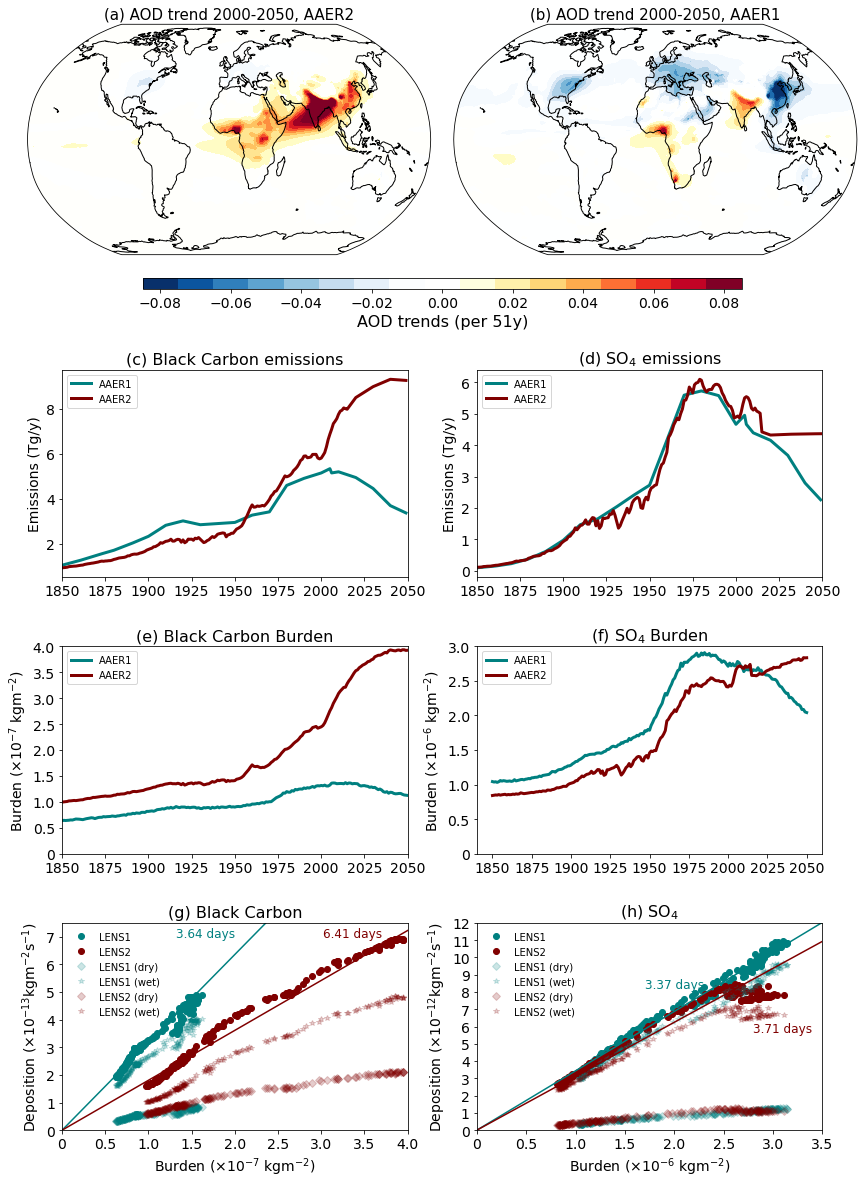

In [18]:
fig = plt.figure(figsize=(16,16))

ax = mymaps.contourmap_bothcontinents_robinson_pos(fig, aod2trend.AODVIS, aod2trend.lon, aod2trend.lat,0.01,-0.08,0.08,'(a) AOD trend 2000-2050, AAER2',
                                                   0.05,0.4,0.77,0.97)

ax = mymaps.contourmap_bothcontinents_robinson_pos(fig, aod1trend.AODVIS, aod1trend.lon, aod1trend.lat,0.01,-0.08,0.08,'(b) AOD trend 2000-2050, AAER1',
                                               0.42,0.77,0.77,0.97)

#ax = mymaps.contourmap_bothcontinents_robinson_pos(fig, aod2trend.AODVIS, aod2trend.lon, aod2trend.lat,0.01,-0.08,0.08,'(b) AODVIS trend 2000-2050, AAER2',
#                                                   0.42,0.77,0.77,0.97)

ax = cbars.plotcolorbar(fig,0.01,-0.08,0.08,'AOD trends (per 51y)',0.15,0.67,0.74,0.75)


#------Emissions plots
ax = fig.add_axes([0.08,0.49,0.3,0.18])
ax.set_title('(c) Black Carbon emissions', fontsize=16)
ax.set_ylabel('Emissions (Tg/y)', fontsize=14)
ax.set_xlim(1850,2050)
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['0','2','4','6','8','10'], fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.plot(aer1_bc.year, aer1_bc, color='teal', linewidth=3, label='AAER1')
ax.plot(aer2_bc.year, aer2_bc, color='maroon', linewidth=3, label='AAER2')
ax.legend()

ax = fig.add_axes([0.44,0.49,0.3,0.18])
ax.set_title('(d) SO$_{4}$ emissions', fontsize=16)
ax.set_ylabel('Emissions (Tg/y)', fontsize=14)
ax.set_xlim(1850,2050)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(['0','1','2','3','4','5','6'], fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.plot(aer1_so4.year, aer1_so4, color='teal', linewidth=3, label='AAER1')
ax.plot(aer2_so4.year, aer2_so4, color='maroon', linewidth=3, label='AAER2')
ax.legend()
#------End Emission plots


#------Burden plots
ax = fig.add_axes([0.08,0.25,0.3,0.18])
ax.set_title('(e) Black Carbon Burden', fontsize=16)
ax.set_ylabel('Burden ($\\times$10$^{-7}$ kgm$^{-2}$)', fontsize=14)
ax.set_xlim(1850,2050)
ax.set_ylim(0,4e-7)
ax.set_yticks([0,0.5e-7,1e-7,1.5e-7,2e-7,2.5e-7,3e-7,3.5e-7,4e-7])
ax.set_yticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0'], fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
# not bothering with the confidence interval because it's so small it's covered by the line
#ax.fill_between(bootburden.year, bootburden.BURDENBCdn_min95_3, bootburden.BURDENBCdn_max95_3, color='lightcoral', alpha=0.5)
#ax.fill_between(bootburden.year, bootburden.BURDENBCdn_min95, bootburden.BURDENBCdn_max95, color='indianred', alpha=0.5)
ax.plot(aer1_bc_burden_gm.year, aer1_bc_burden_gm.BURDENBC, color='teal', linewidth=3, label='AAER1')
ax.plot(aer2_bc_burden_gm.year, aer2_bc_burden_gm.BURDENBCdn, color='maroon', linewidth=3, label='AAER2')
ax.legend()


ax = fig.add_axes([0.44,0.25,0.3,0.18])
ax.set_title('(f) SO$_{4}$ Burden', fontsize=16)
ax.set_ylim(0,3e-6)
ax.set_yticks([0,0.5e-6,1e-6,1.5e-6,2e-6,2.5e-6,3e-6])
ax.set_yticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0'], fontsize=14)
ax.set_xticks([1850,1875,1900,1925,1950,1975,2000,2025,2050])
ax.set_ylabel('Burden ($\\times$10$^{-6}$ kgm$^{-2}$)', fontsize=14)
ax.set_xticklabels(['1850','1875','1900','1925','1950','1975','2000','2025','2050'], fontsize=14)
ax.plot(aer1_so4_burden_gm.year, aer1_so4_burden_gm.BURDENSO4, color='teal', linewidth=3, label='AAER1')
ax.plot(aer2_so4_burden_gm.year, aer2_so4_burden_gm.BURDENSO4dn, color='maroon', linewidth=3, label='AAER2')
ax.legend()


#-----------------------------deposition rates

ax = fig.add_axes([0.08,0.01,0.3,0.18])
ax.set_xlim(0,4e-7)
ax.set_ylim(0,7.5e-13)
ax.set_yticks([0,1e-13,2e-13,3e-13,4e-13,5e-13,6e-13,7e-13])
ax.set_yticklabels(['0','1','2','3','4','5','6','7'], fontsize=14)
ax.set_xticks([0,0.5e-7,1e-7,1.5e-7,2e-7,2.5e-7,3e-7,3.5e-7,4e-7])
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0'], fontsize=14)
ax.set_xlabel('Burden ($\\times$10$^{-7}$ kgm$^{-2}$)', fontsize=14)
ax.set_ylabel('Deposition ($\\times$10$^{-13}$kgm$^{-2}$s$^{-1}$)', fontsize=14)
ax.set_title('(g) Black Carbon', fontsize=16)
ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_gm,"o", color='teal', label='LENS1')
ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_gm,"o", color='maroon', label='LENS2')

ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_dry_gm,"D", color='teal', alpha=0.2, markersize=6, label='LENS1 (dry)')
ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_wet_gm,"*", color='teal', alpha=0.2, markersize=6, label='LENS1 (wet)')

ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_dry_gm,"D", color='maroon', alpha=0.2, markersize=6, label='LENS2 (dry)')
ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_wet_gm,"*", color='maroon', alpha=0.2, markersize=6, label='LENS2 (wet)')

xvals = np.arange(0,5e-7,1e-7)
ax.plot(xvals, (1./np.array(cesm1_bc_lifetime))*xvals, color='teal')
ax.plot(xvals, (1./np.array(cesm2_bc_lifetime))*xvals, color='maroon')
leg = ax.legend()
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.)

ax.text(2.e-7,7e-13,"{:.2f}".format(np.array(cesm1_bc_lifetime)/86400.)+' days', ha='right', color='teal', fontsize=12)
ax.text(3.7e-7,7e-13,"{:.2f}".format(np.array(cesm2_bc_lifetime)/86400.)+' days', ha='right', color='maroon', fontsize=12)

ax = fig.add_axes([0.44,0.01,0.3,0.18])
ax.set_xlim(0,3.5e-6)
ax.set_xticks([0,0.5e-6,1e-6,1.5e-6,2e-6,2.5e-6,3e-6,3.5e-6])
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'], fontsize=14)
ax.set_ylim(0,12e-12)
ax.set_yticks([0,1e-12,2e-12,3e-12,4e-12,5e-12,6e-12,7e-12,8e-12,9e-12,10e-12,11e-12,12e-12])
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12'], fontsize=14)
ax.set_xlabel('Burden ($\\times$10$^{-6}$ kgm$^{-2}$)', fontsize=14)
ax.set_ylabel('Deposition ($\\times$10$^{-12}$kgm$^{-2}$s$^{-1}$)', fontsize=14)
ax.set_title('(h) SO$_{4}$', fontsize=16)

ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_gm,"o", color='teal', label='LENS1')
ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_gm,"o", color='maroon', label='LENS2')

ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_dry_gm,"D", color='teal', alpha=0.2, markersize=6, label='LENS1 (dry)')
ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_wet_gm,"*", color='teal', alpha=0.2, markersize=6, label='LENS1 (wet)')

ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_dry_gm,"D", color='maroon', alpha=0.2, markersize=6, label='LENS2 (dry)')
ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_wet_gm,"*", color='maroon', alpha=0.2, markersize=6, label='LENS2 (wet)')

xvals = np.arange(0,5e-6,1e-6)
ax.plot(xvals, (1./np.array(cesm1_so4_lifetime))*xvals, color='teal')
ax.plot(xvals, (1./np.array(cesm2_so4_lifetime))*xvals, color='maroon')
leg = ax.legend()
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.)

ax.text(3.4e-6,5.7e-12,"{:.2f}".format(np.array(cesm2_so4_lifetime)/86400.)+' days', ha='right', color='maroon', fontsize=12)
ax.text(2.3e-6,8.2e-12,"{:.2f}".format(np.array(cesm1_so4_lifetime)/86400.)+' days', ha='right', color='teal', fontsize=12)

#ax.text(2.4e-6,8.2e-12,"{:.2f}".format(np.array(cesm2_so4_lifetime)/86400.)+' days', ha='right', color='maroon', fontsize=12)
#ax.text(3.4e-6,5.3e-12,"{:.2f}".format(np.array(cesm1_so4_lifetime)/86400.)+' days', ha='right', color='teal', fontsize=12)

fig.savefig(plotpath+'figA1.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'figA1.pdf', bbox_inches='tight', facecolor='white')

In [42]:
(1./np.array(cesm1_bc_lifetime))*xvals

array([0.00000000e+00, 3.17801603e-12, 6.35603205e-12, 9.53404808e-12,
       1.27120641e-11, 1.58900801e-11])

Text(3.4e-06, 5.3e-12, '7.39 days')

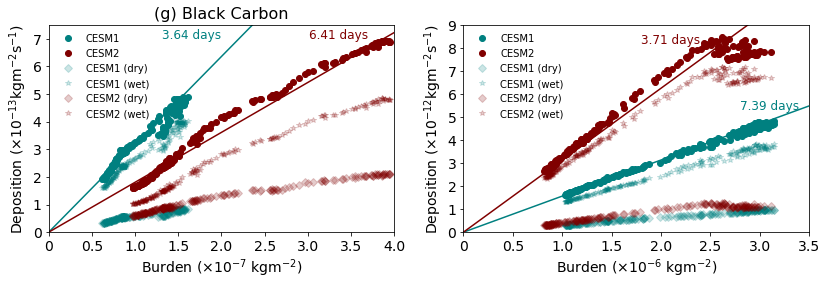

In [193]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.08,0.01,0.3,0.18])
ax.set_xlim(0,4e-7)
ax.set_ylim(0,7.5e-13)
ax.set_yticks([0,1e-13,2e-13,3e-13,4e-13,5e-13,6e-13,7e-13])
ax.set_yticklabels(['0','1','2','3','4','5','6','7'], fontsize=14)
ax.set_xticks([0,0.5e-7,1e-7,1.5e-7,2e-7,2.5e-7,3e-7,3.5e-7,4e-7])
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0'], fontsize=14)
ax.set_xlabel('Burden ($\\times$10$^{-7}$ kgm$^{-2}$)', fontsize=14)
ax.set_ylabel('Deposition ($\\times$10$^{-13}$kgm$^{-2}$s$^{-1}$)', fontsize=14)
ax.set_title('(g) Black Carbon', fontsize=16)
ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_gm,"o", color='teal', label='CESM1')
ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_gm,"o", color='maroon', label='CESM2')

ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_dry_gm,"D", color='teal', alpha=0.2, markersize=6, label='CESM1 (dry)')
ax.plot(cesm1_burden_bc_gm, cesm1_deposition_bc_wet_gm,"*", color='teal', alpha=0.2, markersize=6, label='CESM1 (wet)')

ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_dry_gm,"D", color='maroon', alpha=0.2, markersize=6, label='CESM2 (dry)')
ax.plot(cesm2_burden_bc_gm, cesm2_deposition_bc_wet_gm,"*", color='maroon', alpha=0.2, markersize=6, label='CESM2 (wet)')

xvals = np.arange(0,5e-7,1e-7)
ax.plot(xvals, (1./np.array(cesm1_bc_lifetime))*xvals, color='teal')
ax.plot(xvals, (1./np.array(cesm2_bc_lifetime))*xvals, color='maroon')
leg = ax.legend()
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.)

ax.text(2.e-7,7e-13,"{:.2f}".format(np.array(cesm1_bc_lifetime)/86400.)+' days', ha='right', color='teal', fontsize=12)
ax.text(3.7e-7,7e-13,"{:.2f}".format(np.array(cesm2_bc_lifetime)/86400.)+' days', ha='right', color='maroon', fontsize=12)

ax = fig.add_axes([0.44,0.01,0.3,0.18])
ax.set_xlim(0,3.5e-6)
ax.set_xticks([0,0.5e-6,1e-6,1.5e-6,2e-6,2.5e-6,3e-6,3.5e-6])
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'], fontsize=14)
ax.set_ylim(0,9e-12)
ax.set_yticks([0,1e-12,2e-12,3e-12,4e-12,5e-12,6e-12,7e-12,8e-12,9e-12])
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8','9'], fontsize=14)
ax.set_xlabel('Burden ($\\times$10$^{-6}$ kgm$^{-2}$)', fontsize=14)
ax.set_ylabel('Deposition ($\\times$10$^{-12}$kgm$^{-2}$s$^{-1}$)', fontsize=14)

ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_gm,"o", color='teal', label='CESM1')
ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_gm,"o", color='maroon', label='CESM2')

ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_dry_gm,"D", color='teal', alpha=0.2, markersize=6, label='CESM1 (dry)')
ax.plot(cesm1_burden_so4_gm, cesm1_deposition_so4_wet_gm,"*", color='teal', alpha=0.2, markersize=6, label='CESM1 (wet)')

ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_dry_gm,"D", color='maroon', alpha=0.2, markersize=6, label='CESM2 (dry)')
ax.plot(cesm2_burden_so4_gm, cesm2_deposition_so4_wet_gm,"*", color='maroon', alpha=0.2, markersize=6, label='CESM2 (wet)')

xvals = np.arange(0,5e-6,1e-6)
ax.plot(xvals, (1./np.array(cesm1_so4_lifetime))*xvals, color='teal')
ax.plot(xvals, (1./np.array(cesm2_so4_lifetime))*xvals, color='maroon')
leg = ax.legend()
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.)


ax.text(2.4e-6,8.2e-12,"{:.2f}".format(np.array(cesm2_so4_lifetime)/86400.)+' days', ha='right', color='maroon', fontsize=12)
ax.text(3.4e-6,5.3e-12,"{:.2f}".format(np.array(cesm1_so4_lifetime)/86400.)+' days', ha='right', color='teal', fontsize=12)

In [76]:
bootburden.BURDENBCdn_min95_3

<xarray.DataArray 'BURDENBCdn_min95_3' (year: 131)>
array([1.339410e-07, 1.307703e-07, 1.325864e-07, 1.342834e-07, 1.344508e-07,
       1.353511e-07, 1.335525e-07, 1.347636e-07, 1.342839e-07, 1.360090e-07,
       1.352850e-07, 1.334238e-07, 1.312035e-07, 1.322519e-07, 1.330918e-07,
       1.342264e-07, 1.363013e-07, 1.378787e-07, 1.368097e-07, 1.382484e-07,
       1.402855e-07, 1.392589e-07, 1.403396e-07, 1.410783e-07, 1.403401e-07,
       1.380736e-07, 1.402506e-07, 1.385887e-07, 1.395037e-07, 1.389827e-07,
       1.395410e-07, 1.425801e-07, 1.429457e-07, 1.442485e-07, 1.458820e-07,
       1.485954e-07, 1.527208e-07, 1.573937e-07, 1.605766e-07, 1.652151e-07,
       1.695851e-07, 1.667658e-07, 1.662030e-07, 1.671399e-07, 1.648298e-07,
       1.643589e-07, 1.653955e-07, 1.647468e-07, 1.671967e-07, 1.686721e-07,
       1.713330e-07, 1.749987e-07, 1.772959e-07, 1.807742e-07, 1.809138e-07,
       1.846072e-07, 1.880545e-07, 1.918651e-07, 1.960406e-07, 2.001205e-07,
       2.001587e-07, 2.018642e-07, 2.042002e-07, 2.073515e-07, 2.108535e-07,
       2.134610e-07, 2.159143e-07, 2.194279e-07, 2.240140e-07, 2.269948e-07,
       2.316466e-07, 2.338622e-07, 2.338281e-07, 2.342562e-07, 2.368751e-07,
       2.407636e-07, 2.423723e-07, 2.431233e-07, 2.392981e-07, 2.419773e-07,
       2.425451e-07, 2.451979e-07, 2.502802e-07, 2.578856e-07, 2.657917e-07,
       2.725252e-07, 2.793972e-07, 2.879457e-07, 2.930843e-07, 2.997068e-07,
       3.064746e-07, 3.111091e-07, 3.147706e-07, 3.182790e-07, 3.188146e-07,
       3.256512e-07, 3.311389e-07, 3.354971e-07, 3.396047e-07, 3.451479e-07,
       3.497208e-07, 3.513331e-07, 3.548829e-07, 3.572864e-07, 3.580911e-07,
       3.616078e-07, 3.640194e-07, 3.663562e-07, 3.680379e-07, 3.686177e-07,
       3.715535e-07, 3.761539e-07, 3.778514e-07, 3.793014e-07, 3.791007e-07,
       3.814384e-07, 3.821576e-07, 3.826814e-07, 3.829754e-07, 3.878037e-07,
       3.893639e-07, 3.876517e-07, 3.862529e-07, 3.890099e-07, 3.874058e-07,
       3.886616e-07, 3.880387e-07, 3.893645e-07, 3.902238e-07, 3.863768e-07,
       3.860359e-07])
Coordinates:
  * year      (year) int64 1920 1921 1922 1923 1924 ... 2046 2047 2048 2049 2050
    quantile  float64 ...

In [74]:
print(bootburden)

<xarray.Dataset>
Dimensions:              (year: 131)
Coordinates:
  * year                 (year) int64 1920 1921 1922 1923 ... 2048 2049 2050
    quantile             float64 ...
Data variables:
    BURDENBCdn_min95     (year) float64 ...
    BURDENBCdn_max95     (year) float64 ...
    BURDENBCdn_min95_3   (year) float64 ...
    BURDENBCdn_max95_3   (year) float64 ...
    BURDENSO4dn_min95    (year) float64 ...
    BURDENSO4dn_max95    (year) float64 ...
    BURDENSO4dn_min95_3  (year) float64 ...
    BURDENSO4dn_max95_3  (year) float64 ...


In [19]:
import importlib
importlib.reload(mymaps)

<module 'CASutils.mapplot_utils' from '/home/islas/python/CASanalysis/CASutils/mapplot_utils.py'>